# earlySN Demo

In [1]:
%load_ext autoreload
%autoreload 2
from earlySN import dataset
from earlySN import lightcurve

import matplotlib.pyplot as plt

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rcParams.update({'font.size': 12})
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["figure.autolayout"] = True

Configuration file not found:

    /Users/christineye/.dustmapsrc

To create a new configuration file in the default location, run the following python code:

    from dustmaps.config import config
    config.reset()

Note that this will delete your configuration! For example, if you have specified a data directory, then dustmaps will forget about its location.


## Creating a Dataset object

The base object for early excess searches is `dataset.Dataset`. To load a dataset analyzed in Ye et al. 2024 ([arXiv](https://arxiv.org/abs/2401.02926)), we can select a `default` mode.

In [2]:
yao = dataset.Dataset(base_path = "/Users/christineye/earlySN/earlySN", default = "yao", bands = ['r', 'g'])

First we fit `SALT3` parameters for all SN in the dataset.

In [ ]:
yao.fit_salt(save_path = './demo/', verbose = False)

Let's take a look at the distributions of the `SALT3` fit parameters.

In [4]:
yao.salt_stats()

x0: 0.001 $\pm$ 0.000
x1: 0.144 $\pm$ 0.169
c: -0.014 $\pm$ 0.011


Next, filter based on spectral type and `SALT3` parameters, and apply a correction for peculiar velocities. Note that the `Dataset` object allows you to set specific cut criteria for fit parameters and spectral type.

In [5]:
yao.sn_names

0      ZTF18aailmnv
1      ZTF18aansqun
2      ZTF18aaoxryq
3      ZTF18aapqwyv
4      ZTF18aapsedq
           ...     
122    ZTF18abwmuua
123    ZTF18abwnsoc
124    ZTF18abwtops
125    ZTF18abxxssh
126    ZTF18abxygvv
Name: SN, Length: 127, dtype: object

In [6]:
yao.spectral_filter()
yao.pv_correction()
yao.param_cuts()

We can now fit Tripp parameters to produce a Hubble diagram.

Outliers:  [39]
Repeating Tripp fit without outliers
Fitting Hubble residuals
Tripp parameters: 

$lpha$= 0.10788668704578791 $\pm$ 0.014769027617377785 $\pm$, 
eta$= 2.7800149225248916 $\pm$ 6.179679155238995e-06 $\pm$, 
$\gamma$= 0.03852372490401771 $\pm$ 0.028332440418460406 $\pm$, 
M_0= -19.249103093884173 $\pm$ 0.048491559418132144 $\pm$, 
M_1= -19.16228489629692 $\pm$ 0.029300575270196753 $\pm$, 
M_2= -19.177242385075218 $\pm$ 0.02376228289502766 $\pm$, 
$\sigma_i$= 0.15074105858242257 $\pm$ 0.010633897588002194 $\pm$, 


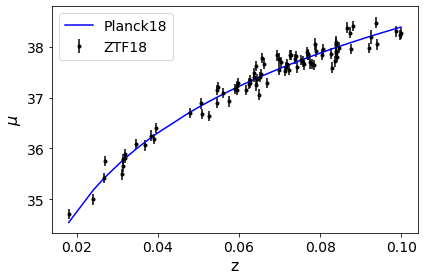

In [7]:
yao.fit_hubble(save_path = './demo/', verbose = True)

So far, everything we've done so far has been saved to `./demo`. In the future, we can reload fits directly from this folder.

In [12]:
yao.load_from_saved('./demo/', load_excess = True)

Loaded Hubble diagram parameters
Loaded excess search results
Loaded lightcurve fit parameters


Now we can search for early excess supernovae. 

In [ ]:
yao.excess_search(verbose = False, save_path = './demo/')

In [13]:
yao.gold = ['ZTF18aayjvve',  'ZTF18abcflnz',
           'ZTF18abucvbf', 'ZTF18abxxssh', ]

yao.bronze = ['ZTF18aasdted', 'ZTF18abaxlpi', 'ZTF18abimsyv',
               'ZTF18abfgygp', 'ZTF18aaxsioa', 'ZTF18abssuxz', 'ZTF18abfhryc',
             'ZTF18aaslhxt', 'ZTF18aazsabq', 'ZTF18abauprj', ]

also_in_literature = ['ZTF18aapqwyv', 'ZTF18aaqqoqs', 'ZTF18aayjvve', 'ZTF18abckujq', 'ZTF18abcrxoj',
                     'ZTF18abdfazk', 'ZTF18abdfwur', 'ZTF18abfhryc', 'ZTF18abgxvra', 'ZTF18abpamut',]

yao.gold_nd = ['ZTF18aavrzxp', 'ZTF18aazblzy', 'ZTF18abcysdx', 'ZTF18abetehf', 'ZTF18abxygvv']

In [14]:
yao.excess = yao.gold + yao.bronze
yao.nd = []

for i in yao.sn_names:
    if i not in yao.gold and i not in yao.bronze:
        yao.nd += [i]

In [15]:
yao.N.loc['ZTF18aayjvve']['N'] = 8
yao.N.loc['ZTF18abcflnz']['N'] = 9
yao.N.loc['ZTF18abucvbf']['N'] = 8
yao.N.loc['ZTF18abxxssh']['N'] = 10
yao.N.loc['ZTF18aaslhxt']['N'] = 8
yao.N.loc['ZTF18aasdted']['N'] = 8
yao.N.loc['ZTF18aaxsioa']['N'] = 7
yao.N.loc['ZTF18aazsabq']['N'] = 8
yao.N.loc['ZTF18abaxlpi']['N'] = 9
yao.N.loc['ZTF18abauprj']['N'] = 9
yao.N.loc['ZTF18abimsyv']['N'] = 9
yao.N.loc['ZTF18abfgygp']['N'] = 9
yao.N.loc['ZTF18abfhryc']['N'] = 11
yao.N.loc['ZTF18abssuxz']['N'] = 4

With the early excess search complete, we can look at some properties of the lightcurve fits.

In [16]:
yao.compute_bump_properties()

r 1.74374703690166 0.12360308697796818
g 1.9086282843350868 0.11578786695198007
$\alpha_g - \alpha_r = 0.1648812474334267 \pm 0.1693651476655472$


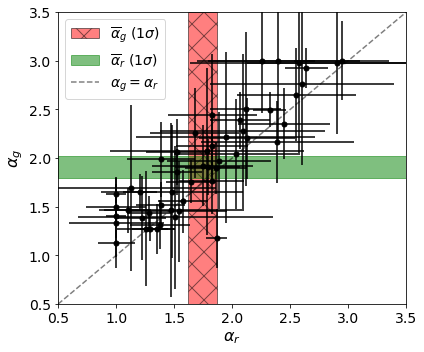

In [17]:
yao.analyze_PL(subset = "all", cut_err = True, save_fig = './demo/')

Gold x1:  -0.11334233834981915 0.47176635831381486
Excess x1:  0.056498407204904254 0.23523114327503147
No Excess x1:  -0.1423495125855333 0.1324248375453648
Gold c:  -0.0294057083608868 0.035793259310462774
Excess c:  -0.01325888661611 0.028432967715680747
No Excess c:  -0.0083482776928259 0.0109366726744659


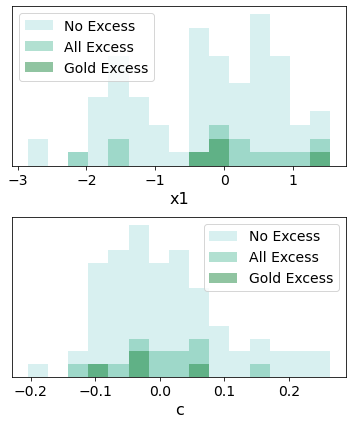

In [18]:
yao.compare_fit_params(save_fig = './demo/')

$\mu$ 1.0566089889392656 0.5509668900548347
$\sigma$ 0.7971218024927347 0.21872426446414556


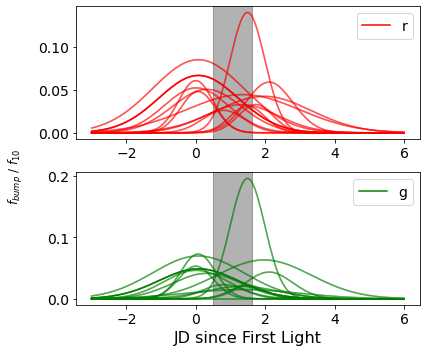

In [19]:
yao.analyze_bump_shapes(save_fig = './demo/', subset = "excess")

r : 0.049424119936038936 0.005600549852872984
g : 0.04496348429311966 0.008727520229582106
$fr - fg = -0.004460635642919278 \pm 0.010369945419927749$
$\log_{10}(g - r) = 0.09877730531565622 \pm 0.1114993399971114$


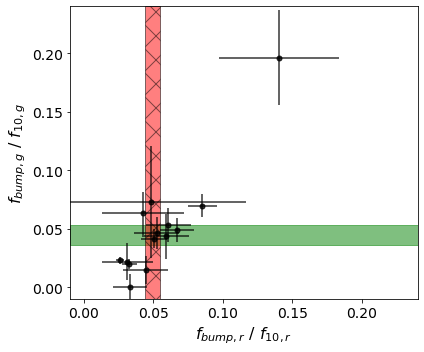

In [20]:
yao.analyze_bump_amps(save_fig = './demo/')

r PearsonRResult(statistic=0.2984273309960773, pvalue=0.3000310018882526)
g PearsonRResult(statistic=0.3872471932093308, pvalue=0.17132791312906923)


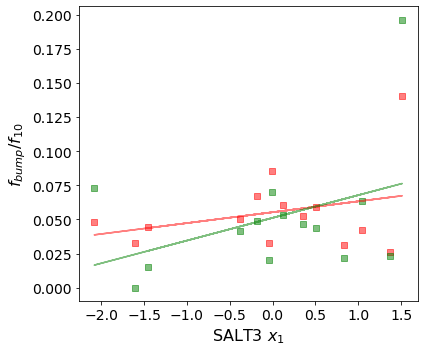

In [22]:
yao.analyze_stretch_correlation(save_fig = './demo/')

We can also produce the population-level analyses of Hubble residuals and host galaxy masses.

Overall scatter:  0.15387197695360505


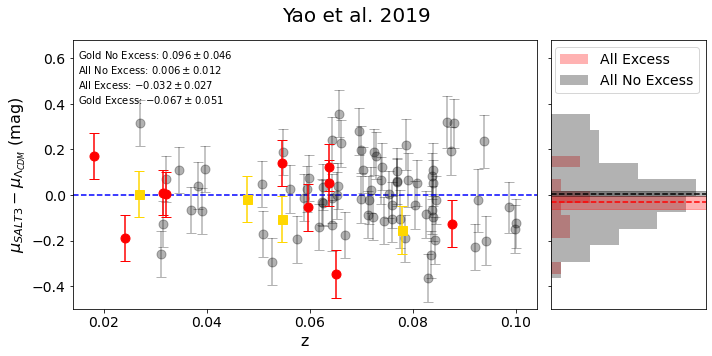

In [23]:
yao.compare_excess()

Levene : LeveneResult(statistic=0.3913437953994129, pvalue=0.5332505153192723)
Bartlett : BartlettResult(statistic=0.20037185118504347, pvalue=0.6544208657443735)
Excess difference : -0.5409604416349119 0.23920926135412285
Gold difference : -0.7921938730910263 0.8936732976459562


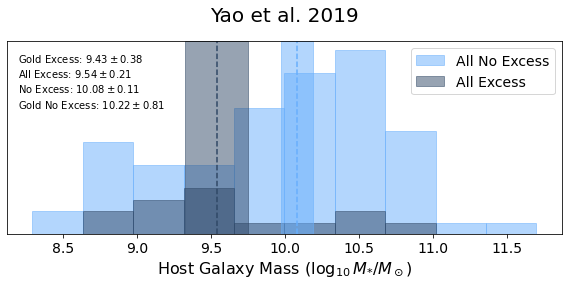

In [24]:
yao.compare_mass(save_fig = './demo/')

## Other handy functionality!

For more fine-grained analysis, we can fit a single supernova.

9 {'r': 0, 'g': 2}


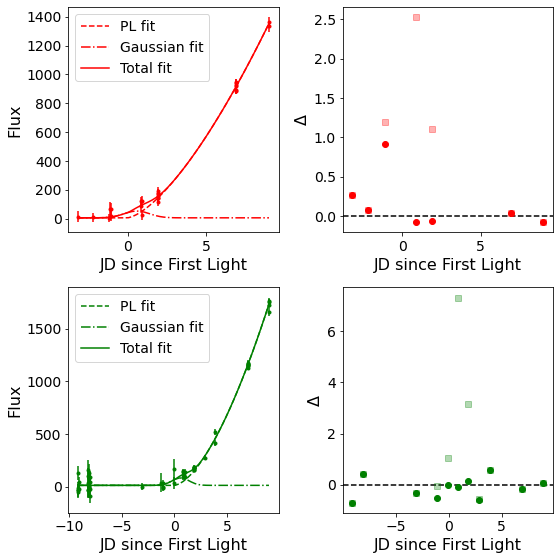

In [32]:
yao.fit_single_sn('ZTF18aaslhxt', cut = 9)